In [310]:
# fix for windows memory leak with MKL
import os
import platform

if platform.system() == "Windows":
    os.environ["OMP_NUM_THREADS"] = "2"

# import libraries
import time
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # this is used for the plot of the graph
from adjustText import adjust_text
from scipy.stats import mode
from scipy.stats import zscore
from scipy.stats import median_abs_deviation
# Sklearn classes
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score, make_scorer, recall_score, f1_score
import sklearn.metrics.cluster as smc
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from helper import (
    draw_confusion_matrix,
    heatmap,
    make_meshgrid,
    plot_contours,
    draw_contour,
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sets random seed for reproducibility
SEED = 42
random.seed(SEED)


In [311]:
# Load Data
data = pd.read_csv("Data_Niki.csv")

# Dropping Unnecessary Rows and Columns
data = data.drop(index=[0,1])
columns_to_drop = ["Dont care", "Visualization", "Visualization.1", "Engineer classification", "Parameter name", "Unnamed: 9"]
param_name = data["Parameter name"]
data = data.drop(columns=columns_to_drop, errors='ignore')

data.head()

C:\Users\nxg15046\AppData\Local\Temp\1\ipykernel_21500\2889359007.py:2: DtypeWarning: Columns (1,2,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

,Engineer classification.1,Tranditional statistics,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,

In [312]:
# Relabeling as Release or Investigate (0 or 1)
data['Engineer classification.1'] = (data['Engineer classification.1'] == 'Release').astype(int)

# Converting from String to Numerical
data = data.apply(pd.to_numeric, errors='coerce') 

# Addressing Null Values
data.replace('NaN', np.nan, inplace=True)
data.replace('#N/A', np.nan, inplace=True)
data.replace('#NAME?', np.nan, inplace=True)
data.fillna(data.median(numeric_only=True), inplace=True)

In [313]:
# Obtaining Data with Purely Median and Std (nothing else)

columns_to_drop = ['Engineer classification.1', 'Tranditional statistics'] # removed Unnamed: 7, Unnamed: 8
y = data['Engineer classification.1']
traditional_stat = data['Tranditional statistics']
# lower_lim = data['Unnamed: 7']
# upper_lim = data['Unnamed: 8']
only_med_std = data.drop(columns=columns_to_drop, axis=1)

In [314]:
# Extracting Median and Standard Deviation
med = only_med_std.iloc[:, 0:194] # originally 0:192
std = only_med_std.iloc[:, 194:388] # originally 192:386

# Standardizing by Row
z_med = med.apply(zscore, axis=1)
z_med = pd.DataFrame(z_med.tolist(), index=med.index, columns=med.columns)
z_std = std.apply(zscore, axis=1)
z_std = pd.DataFrame(z_std.tolist(), index=std.index, columns=std.columns)

# Range (need to remove lower and upper limit)
z_med_min = z_med.iloc[:, 2:].min(axis=1)
z_std_min = z_std.iloc[:, :].min(axis=1)
z_med_max = z_med.iloc[:, 2:].max(axis=1)
z_std_max = z_std.iloc[:, :].max(axis=1)
z_med_range = z_med_max - z_med_min
z_std_range = z_std_max - z_std_min

## Inter-Quartile Range
Q1_med = z_med.quantile(0.25, axis=1)
Q3_med = z_med.quantile(0.75, axis=1)
z_med_iqr = Q3_med - Q1_med
Q1_std = z_std.quantile(0.25, axis=1)
Q3_std = z_med.quantile(0.75, axis=1)
z_std_iqr = Q3_std - Q1_std

## Median Absolute Deviation
z_med_mad = z_med.apply(median_abs_deviation, axis=1)
z_std_mad = z_std.apply(median_abs_deviation, axis=1)

## Skewness
med_skewness = med.skew(axis=1)
std_skewness = std.skew(axis=1)

## Kurtosis (Propensity for Outliers)
med_kurtosis = med.kurt(axis=1)
std_kurtosis = std.kurt(axis=1)

In [315]:
# Removed param name from x
x = pd.concat([z_med_range, z_std_range, z_med_iqr, z_std_iqr, z_med_mad, z_std_mad, med_skewness, std_skewness, med_kurtosis, std_kurtosis, y], axis=1)

# Assigning New Column Names to Bypass Column Name Repeating Issue
num_columns = x.shape[1]
x.columns = x.columns.astype(str)
new_columns = ["z_med_range", "z_std_range", "z_med_iqr", "z_std_iqr", "z_med_mad", "z_std_mad", "med_skewness", "std_skewness", "med_kurtosis", "std_kurtosis", "y"]
x.columns = new_columns

corr_matrix = x.corr(numeric_only=True)
print(corr_matrix["y"].sort_values(ascending=False))
x = x.drop('y', axis=1)

y               1.000000
med_skewness    0.247892
z_med_iqr       0.171369
z_med_mad       0.145245
z_std_iqr       0.083065
std_kurtosis   -0.073561
std_skewness   -0.133288
z_std_range    -0.194422
z_std_mad      -0.220055
z_med_range    -0.350551
med_kurtosis   -0.501368
Name: y, dtype: float64


In [316]:
# Replace inf/-inf with NaN
x.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clip extreme values in numerical columns
lower_cap = -1e10
upper_cap = 1e10
numerical_features = x.select_dtypes(include=["number"]).columns.tolist()
x[numerical_features] = x[numerical_features].clip(lower=lower_cap, upper=upper_cap)

# Train Test Split
train_raw, test_raw, target, target_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

# Applying Pipeline to Train and Test Data
categorical_features = x.select_dtypes(exclude=["number"]).columns.tolist()
numerical_features = x.select_dtypes(include=["number"]).columns.tolist()
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("normalizer", StandardScaler())])
full_pipeline = ColumnTransformer([("num", num_pipeline, numerical_features), ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])

train = full_pipeline.fit_transform(train_raw)
test = full_pipeline.transform(test_raw)

In [317]:
# Use best LGBM or predict whether each test parameter has problematic test sites
# NOTE: Using default parameters here. You would replace this with your 'best_params_lgbm'.
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 50}
lgbm = LGBMClassifier(**best_params, random_state=42)
lgbm.fit(train, target)
predicted = lgbm.predict(test) # These are the predictions for the test set

print(f"LGBM Model found {np.sum(predicted == 0)} test parameters to investigate.")

[LightGBM] [Info] Number of positive: 1584, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 1869, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.847512 -> initscore=1.715219
[LightGBM] [Info] Start training from score 1.715219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\nxg15046\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [318]:
# Only keeps the rows we need to investigate

df = pd.DataFrame({'LightGBM': predicted}, index=target_test.index+2)
df = df[df['LightGBM'] == 0]
df = df.sort_index()

# Only keep rows to investigate
z_med = z_med.iloc[:, 2:]
z_std = z_std.iloc[:, :]
z_med.index = z_med.index + 2
z_std.index = z_std.index + 2

z_med = z_med.loc[df.index]
z_std = z_std.loc[df.index]

# Rename columns
new_columns = [f'site{i+1}' for i in range(z_med.shape[1])]
z_med.columns = new_columns
z_std.columns = new_columns


full_data = pd.concat([z_med, z_std], axis=1)
print(full_data)

         site1     site2     site3     site4     site5     site6     site7  \
4     0.158189  0.071547  0.192846  0.175518  0.140861  0.210175  0.106204   
13    0.047185  0.108302  0.115856  0.011869 -0.044049 -0.029334  0.130963   
27   -0.321242 -1.259335 -0.190741 -0.138162  0.082555  0.251828 -0.505645   
55    0.133521  0.155947  0.230704  0.155947  0.111094  0.111094  0.155947   
57    0.147484  0.236342  0.236342  0.111942  0.111942  0.067513  0.147484   
60    0.057612  0.057612  0.177276  0.177276  0.141377  0.093511  0.141377   
63    0.127482  0.232086  0.157369  0.157369  0.112538  0.067708  0.127482   
64    0.112332  0.263319  0.225573  0.225573  0.112332  0.074586  0.124915   
68    0.149475  0.149475  0.227010  0.227010  0.110707  0.110707  0.188242   
70    0.157950  0.157950  0.230534  0.157950  0.109561  0.109561  0.157950   
71    0.150102  0.150102  0.194560  0.150102  0.116759  0.116759  0.150102   
73    0.111771  0.305375  0.193289  0.193289  0.152530  0.152530

In [ ]:
param_1_med = z_med.iloc[0, :]
param_1_std = z_std.iloc[0, :]
data = pd.concat([param_1_med, param_1_std], axis=1)
data.columns = ['med', 'std']
print(data)

              med       std
site1    0.021359 -0.000052
site2    0.010625 -0.000158
site3    0.010330 -0.000051
site4    0.014466 -0.000099
site5    0.013678 -0.000036
site6    0.012792 -0.000114
site7    0.020571 -0.000052
site8    0.007671 -0.000016
site9   -0.047770  0.000123
site10  -0.001389  0.000027
site11   0.001172 -0.000052
site12  -0.000601  0.000064
site13  -0.034772  0.000026
site14  -0.002964 -0.000076
site15   0.002255  0.000041
site16   0.011512  0.000052
site17  -0.007691  0.000010
site18   0.014958 -0.000094
site19   0.003634 -0.000050
site20   0.007967  0.000012
site21  -0.010714 -0.000036
site22   0.026381  0.000081
site23   0.008951 -0.000005
site24   0.030419 -0.000079
site25  -0.033984 -0.000005
site26   0.010133  0.000064
site27  -0.005721  0.000069
site28  -0.024107  0.000109
site29  -0.027878  0.000020
site30   0.003437  0.000054
site31  -0.005131 -0.000041
site32   0.006194 -0.000026
site33   0.008262 -0.000043
site34   0.002747  0.000046
site35   0.004028  0

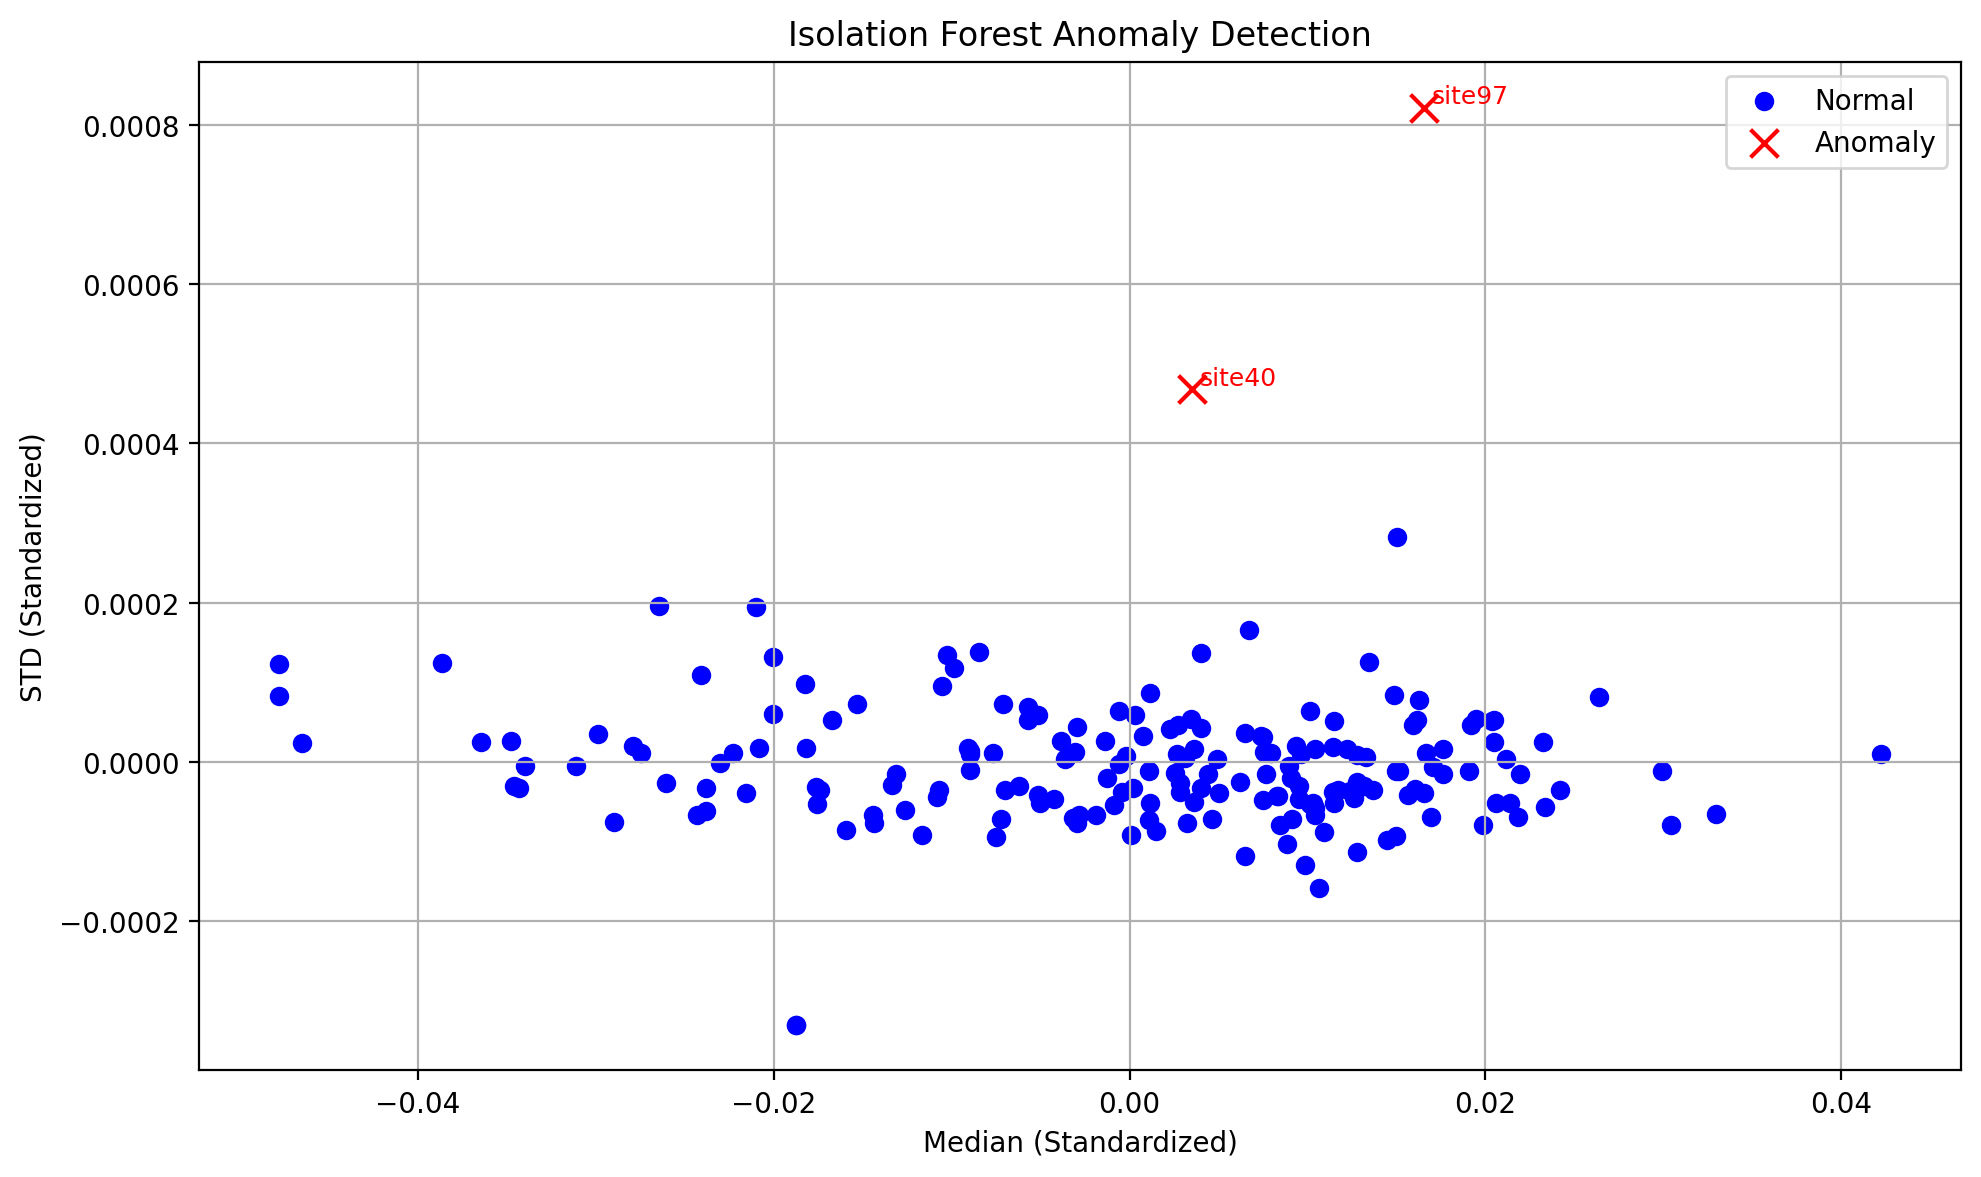

Anomalous sites detected:
['site40', 'site97']


In [335]:
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['med', 'std']])

# Plotting
plt.figure(figsize=(10, 6))
normal = data[data['anomaly'] == 1]
anomalies = data[data['anomaly'] == -1]

plt.scatter(normal['med'], normal['std'], c='blue', label='Normal')
plt.scatter(anomalies['med'], anomalies['std'], c='red', label='Anomaly', marker='x', s=100)

# Annotate anomalies with site names
texts = []
for site, row in anomalies.iterrows():
    texts.append(plt.text(row['med'], row['std'], site, fontsize=9, color='red'))
adjust_text(texts)

"""
# Annotate site44 if it exists in the data
if 'site44' in data.index:
    row = data.loc['site44']
    plt.scatter(row['med'], row['std'], c='green', label='site44', marker='o', s=100)
    plt.annotate('site44', (row['med'], row['std']), textcoords="offset points", xytext=(5,5), ha='left', fontsize=9, color='green')
"""

plt.xlabel('Median (Standardized)')
plt.ylabel('STD (Standardized)')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print anomalous site names
print("Anomalous sites detected:")
print(anomalies.index.tolist())


In [336]:
print(df.index[0:100])

Index([   4,   13,   27,   55,   57,   60,   63,   64,   68,   70,   71,   73,
         74,   75,   79,   80,   82,   85,   89,   90,   94,  101,  102,  104,
        159,  161,  163,  164,  165,  168,  171,  172,  175,  176,  187,  191,
        207,  210,  215,  217,  220,  225,  227,  229,  230,  246,  249,  252,
        254,  258,  272,  276,  280,  284,  287,  292,  296,  299,  302,  304,
        309,  310,  315,  318,  322,  324,  326,  331,  336,  338,  344,  351,
        356,  362,  398,  399,  400,  415,  420,  422,  427,  431,  441,  444,
        449,  521,  526,  528,  534,  537,  539,  541,  542, 1136, 1137, 1148,
       1162, 1197, 1199, 1203],
      dtype='int64')


In [ ]:
# Seems to me like standard deviation does not have that big of an impact on decision than median
# I want code where the plot title will include which row it is on the spreadsheet
# I also want some mechanism to compare our predicted to engineer classification
# Also examine what it looks like on Exensio

# Dont fill na with 0 (keep as na)
# 1. Generate own median and standard deviation values directly from EY
# 2. Retrain binary classification models again with own document
# Note: if value exists, then valid. If value n/a, the don't consider

# Use Gauge R and R first
